# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "DAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'DAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.295  1  0.628 0.429 0.003   
                             age        0.124  1  0.263 0.609 0.001   
                             Kiel       1.819  1  3.867 0.051 0.020   
                             Magdeburg  4.127  1  8.776 0.003 0.044   
                             Sweden     7.277  1 15.474 0.000 0.075   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.004  1  0.005 0.947 0.000   
                             age        1.554  1  1.834 0.177 0.010   
                             Kiel       0.016  1  0.019 0.892 0.000   
                             Magdeburg  1.912  1  2.256 0.135 0.012   
                             Sweden    18.440  1 21.758 0.000 0.102   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.367  0.586    False  
                             age               0.215  0.740    False  
                             Kiel              1.295  0.124    False  
                             Magdeburg         2.463  0.014     True  
                             Sweden            3.932  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.024  0.970    False  
                             age               0.751  0.319    False  
                             Kiel              0.050  0.937    False  
                             Magdeburg         0.871  0.262    False  
                             Sweden            5.236  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     DAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.114  1  7.955 0.005 0.040   
                             age        0.010  1  0.068 0.794 0.000   
                             Kiel       0.297  1  2.122 0.147 0.011   
                             Magdeburg  0.473  1  3.379 0.068 0.017   
                             Sweden     1.681  1 12.005 0.001 0.059   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         4.657  1  7.125 0.008 0.036   
                             age        0.338  1  0.517 0.473 0.003   
                             Kiel       3.437  1  5.258 0.023 0.027   
                             Magdeburg  4.068  1  6.224 0.013 0.032   
                             Sweden    21.821  1 33.383 0.000 0.149   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.275  0.015     True  
                             age               0.100  0.862    False  
                             Kiel              0.833  0.244    False  
                             Magdeburg         1.170  0.130    False  
                             Sweden            3.184  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                2.083  0.023     True  
                             age               0.325  0.596    False  
                             Kiel              1.640  0.053    False  
                             Magdeburg         1.871  0.034     True  
                             Sweden            7.518  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                    DAE                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.005         2.275  0.015     True   
                             Kiel      0.147         0.833  0.244    False   
                             Magdeburg 0.068         1.170  0.130    False   
                             Sweden    0.001         3.184  0.002     True   
                             age       0.794         0.100  0.862    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.008         2.083  0.023     True   
                             Kiel      0.023         1.640  0.053    False   
                             Magdeburg 0.013         1.871  0.034     True   
                             Sweden    0.000         7.518  0.000     True   
                             age       0.473         0.325  0.596    False   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.429         0.367  0.586    False  
                             Kiel      0.051         1.295  0.124    False  
                             Magdeburg 0.003         2.463  0.014     True  
                             Sweden    0.000         3.932  0.001     True  
                             age       0.609         0.215  0.740    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.947         0.024  0.970    False  
                             Kiel      0.892         0.050  0.937    False  
                             Magdeburg 0.135         0.871  0.262    False  
                             Sweden    0.000         5.236  0.000     True  
                             age       0.177         0.751  0.319    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'DAE': 'DAE', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.222         3.276     0.274     0.261         2.482     0.338
std       0.294         6.043     0.320     0.304         5.335     0.331
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.000         0.413     0.002     0.004         0.336     0.015
50%       0.057         1.240     0.115     0.122         0.914     0.244
75%       0.386         3.361     0.515     0.462         2.415     0.616
max       0.998        85.811     0.998     1.000       149.377     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_34461/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                       DAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.005         2.275   
A0A024R0T9;K7ER74;P02655                           AD     0.030         1.522   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.261         0.584   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.266         0.575   
A0A075B6H7                                         AD     0.033         1.488   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.210         0.678   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.607         0.216   
S4R3U6                                             AD     0.008         2.083   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.015     True   
A0A024R0T9;K7ER74;P02655                           AD      0.067    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.384    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.390    False   
A0A075B6H7                                         AD      0.072    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.281    False   
Q9Y6X5                                             AD      0.325    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.155    False   
Q9Y6Y9                                             AD      0.715    False   
S4R3U6                                             AD      0.023     True   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.429         0.367   
A0A024R0T9;K7ER74;P02655                           AD     0.055         1.257   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.203         0.693   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.558         0.253   
A0A075B6H7                                         AD     0.231         0.637   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.067         1.174   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.826         0.083   
S4R3U6                                             AD     0.947         0.024   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.586    False  
A0A024R0T9;K7ER74;P02655                           AD      0.132    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.351    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.697    False  
A0A075B6H7                                         AD      0.384    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.234         1.607     0.293     0.255         1.402     0.337
std       0.290         1.857     0.313     0.294         1.646     0.319
min       0.000         0.002     0.000     0.000         0.000     0.000
25%       0.007         0.404     0.019     0.012         0.364     0.040
50%       0.083         1.079     0.155     0.124         0.906     0.247
75%       0.395         2.173     0.523     0.433         1.911     0.590
max       0.996        23.769     0.996     1.000        23.477     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,DAE,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,928,1023


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

DAE                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.005         2.275  0.015   
A0A024R0T9;K7ER74;P02655                           0.030         1.522  0.067   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.261         0.584  0.384   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.266         0.575  0.390   
A0A075B6H7                                         0.033         1.488  0.072   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.281   
Q9Y6X5                                             0.210         0.678  0.325   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.155   
Q9Y6Y9                                             0.607         0.216  0.715   
S4R3U6                                             0.008         2.083  0.023   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.429   
A0A024R0T9;K7ER74;P02655                              False 0.055   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.203   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.558   
A0A075B6H7                                            False 0.231   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.067   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.826   
S4R3U6                                                 True 0.947   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.367  0.586   
A0A024R0T9;K7ER74;P02655                                   1.257  0.132   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.693  0.351   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.253  0.697   
A0A075B6H7                                                 0.637  0.384   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.316   
Q9Y6X5                                                     1.174  0.154   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.183   
Q9Y6Y9                                                     0.083  0.900   
S4R3U6                                                     0.024  0.970   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                              

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
DAE (no)  - PI (no)    873
DAE (yes) - PI (yes)   343
DAE (yes) - PI (no)    150
DAE (no)  - PI (yes)    55
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_34461/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


DAE                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.005         2.275  0.015     True 0.429   
A0A075B6I0                   0.001         3.157  0.003     True 0.025   
A0A075B6J9                   0.016         1.785  0.040     True 0.053   
A0A075B6Q5                   0.006         2.235  0.017     True 0.787   
A0A075B6R2                   0.000         3.377  0.002     True 0.303   
...                            ...           ...    ...      ...   ...   
Q9UNW1                       0.907         0.043  0.941    False 0.006   
Q9UP79                       0.000         4.747  0.000     True 0.534   
Q9UQ52                       0.001         3.209  0.002     True 0.067   
Q9Y6C2                       0.003         2.568  0.009     True 0.929   
S4R3U6                       0.008         2.083  0.023     True 0.947   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.367  0.586    False       186  
A0A075B6I0                           1.597  0.072    False       194  
A0A075B6J9                           1.279  0.127    False       156  
A0A075B6Q5                           0.104  0.872    False       104  
A0A075B6R2                           0.519  0.465    False       164  
...                                    ...    ...      ...       ...  
Q9UNW1                               2.240  0.021     True       171  
Q9UP79                               0.272  0.679    False       135  
Q9UQ52                               1.175  0.154    False       188  
Q9Y6C2                               0.032  0.960    False       119  
S4R3U6                               0.024  0.970    False       126  

[205 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,DAE,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.015,0.586,186,DAE (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.067,0.132,195,DAE (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.384,0.351,174,DAE (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.390,0.697,196,DAE (no) - PI (no)
A0A075B6H7,0.072,0.384,91,DAE (no) - PI (no)
...,...,...,...,...
Q9Y6R7,0.281,0.316,197,DAE (no) - PI (no)
Q9Y6X5,0.325,0.154,173,DAE (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.155,0.183,197,DAE (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,DAE,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P52758,0.981,0.002,119,DAE (no) - PI (yes),0.979
O94898,0.001,0.965,60,DAE (yes) - PI (no),0.965
Q8NCH0,0.988,0.026,113,DAE (no) - PI (yes),0.962
P43004;P43004-2;P43004-3,0.045,0.997,89,DAE (yes) - PI (no),0.952
Q9Y6C2,0.009,0.960,119,DAE (yes) - PI (no),0.951
...,...,...,...,...,...
Q9NX62,0.045,0.055,197,DAE (yes) - PI (no),0.010
P00740;P00740-2,0.042,0.052,197,DAE (yes) - PI (no),0.010
K7ERG9;P00746,0.041,0.051,197,DAE (yes) - PI (no),0.010


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_1_DAE


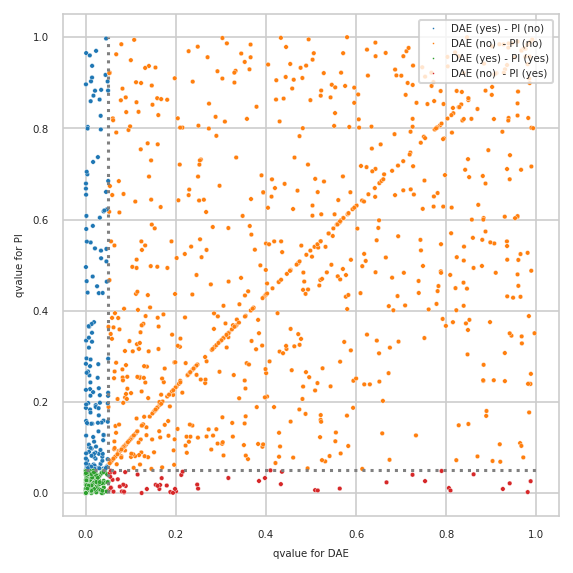

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_2_DAE


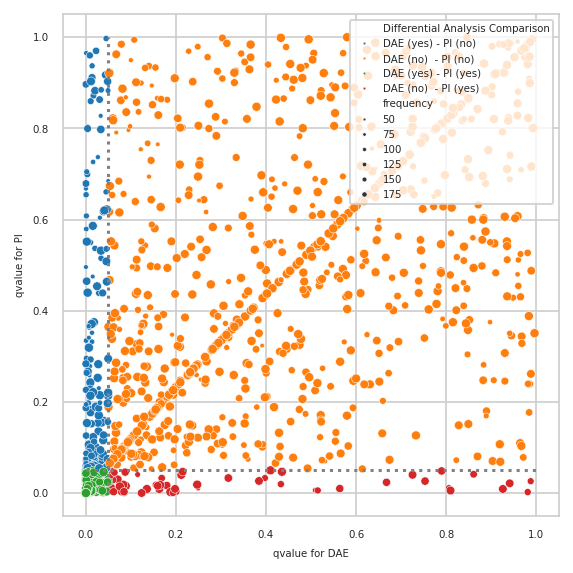

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN1,ENSP00000326366,5.000
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
MAMSTR,ENSP00000324175,0.680
KCNE4,ENSP00000281830,0.680
U7,U7,0.680


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/924ec7e362d761ecf0807b9074d79999_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3587: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out